<a href="https://colab.research.google.com/github/TiffanyHizon/Linear_Algebra_58051/blob/main/Prelim%20Exam/LinAlg_58051_Hizon_Prelim_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bebang's Online Business**
You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. 

Consider the computational algorithm:

The efficiency is composed of the profit ($p$) and FaceBook post reach ($r$).

Let the magnitude of the monthly efficiency be $E_m$, weekly efficiency be $E_w$, the y component of the monthly efficiency as $E_m\hat{y}$, the x component of the monthly efficiency as $E_m\hat{x}$, and $\theta$ as the gradient of the efficiency.

$$
E_w = r \hat{x} + p \hat{y} \\ _{(Eq.1)} \\
$$
<br>
$$
E_m = \sqrt{\sum{(E_w)^2}}\\ _{(Eq.2)} \\
$$<br>
$$
\theta = \arctan{\left(\frac{E_m\hat{y}}{E_m\hat{x}+\alpha} \right)}\\ _{(Eq.3)} 
$$

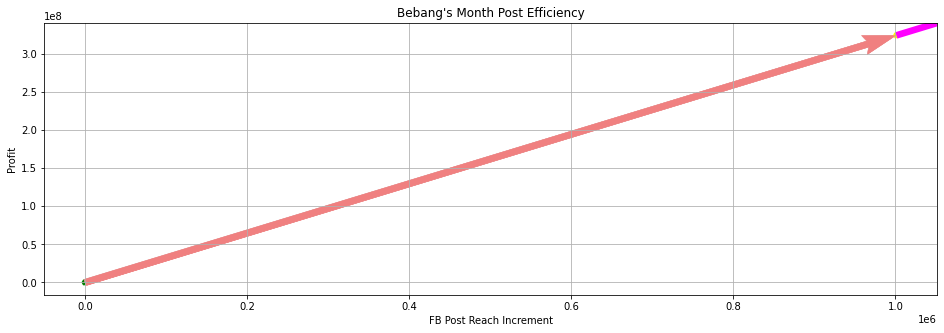

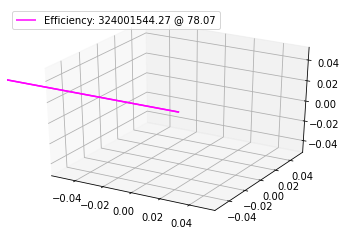

In [8]:
import numpy as np
import matplotlib.pyplot as plt

profit = np.array([-18000, 19000, 20000, 17000])
reach = np.array([1000, 500, 250, 25])
revenue = np.array([1000, 2000, 3000, 4000])

def month_profit_trace(profit, reach, make_figs=True):
    if (profit.shape == (4,)) and (revenue.shape == (4,)):
        e_week1 = np.array((reach[0], profit[0]))
        e_week2 = np.array((reach[1], profit[1]))
        e_week3 = np.array((reach[2], profit[2]))
        e_week4 = np.array((reach[3], profit[3]))

        e_month = np.square((np.square(e_week1, e_week2), e_week3, e_week4)) #applying the monthly efficiency formula
        e_month_magnitude = np.sqrt(np.sum(e_month)) #applying the monthly efficiency formula
        alpha = 6.31134  # solved manually using formula for the gradient of efficiency
        theta = np.arctan(np.add(np.sin(e_month_magnitude) / np.cos(e_month_magnitude), alpha)) #applying the gradient of efficiency formula
        theta = np.degrees(theta) #getting the degrees

        plt.figure(figsize=(16, 5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim=(0, 1.01 * np.sum(reach))
        plt.ylim=(-np.sum(np.abs(profit)), np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2

        resultant_Vector1 = np.add(e_week1, e_week2)
        resultant_Vector2 = np.add(np.add(e_week1, e_week2), e_week3, e_week4)

        plt.quiver(0, 0, e_week1[0], e_week1[1],  #plotting the Week 1 vector
                   angles='xy', scale_units='xy', scale=1, color='green',
                   label='Week 1: {:.2f}'.format(np.linalg.norm(e_week1)))
        plt.quiver(e_week1[0], e_week1[1], e_week2[0], e_week2[1], #plotting the Week 2 vector
                   angles='xy', scale_units='xy', scale=1, color='red',
                   label='Week 2: {:.2f}'.format(np.linalg.norm(e_week2)))
        plt.quiver(0, 0, resultant_Vector1[0], resultant_Vector1[1], #plotting the Resultant Vector of vectors e_week1 and e_week2
                   angles='xy', scale_units='xy', scale=1, color='lightgray',
                   label='R1: {:.2f}'.format(np.linalg.norm(resultant_Vector1)))
        plt.quiver(resultant_Vector1[0], resultant_Vector1[1], e_week3[0], e_week3[1], #plotting the Week 3 Vector
                   angles='xy', scale_units='xy', scale=1, color='yellow',
                   label='Week 3: {:.2f}'.format(np.linalg.norm(e_week3)))
        plt.quiver(resultant_Vector2[0], resultant_Vector2[1], e_week4[0], e_week4[1], #plotting the Week 4 vector
                   angles='xy', scale_units='xy', scale=1, color='magenta',
                   label='Week 4: {:.2f}'.format(np.linalg.norm(e_week4)))
        plt.quiver(0, 0, resultant_Vector2[0], resultant_Vector2[1], #Plotting the Resultant Vector 
                   angles='xy', scale_units='xy', scale=1, color='lightcoral',
                   label='R2: {:.2f}'.format(np.linalg.norm(resultant_Vector2)))

      

        figure = plt.figure()
        axis = figure.gca(projection='3d')

        axis.quiver(0, 0, 0, e_month[0], e_month[1], e_month[2], color='magenta', label='Efficiency: {:.2f} @ {:.2f}'.format(e_month_magnitude, theta))


        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(e_month_magnitude)}@{int(theta)}.png', dpi=300)

        plt.show()

    else:
       print('Dimension cannot be created')


month_profit_trace(profit, reach, make_figs=True)

$$Profit = \begin{bmatrix} -18000\\19000\\20000\\17000 \\\end{bmatrix} , Reach = \begin{bmatrix} 1000\\500\\250\\25 \\\end{bmatrix} $$

$$ Week 1 = 1000\hat{x} + -18000\hat{y} \\
Week 2 = 500\hat{x} + 19000\hat{y} \\ Week 3 = 250\hat{x} + 20000\hat{y} \\ Week 4 = 25\hat{x} + 17000\hat{y}$$